In [3]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

import torch
from torch import nn
from torch.nn import functional as nnf

We want to estimate the variance from the following problem:
$$
\sigma \sim \mathcal U(0, A)
$$
As our prior, and then our likelihood is given by:
$$
x \mid \sigma \sim \mathcal N(0, \sigma^2)
$$

# Single sigma example

In [2]:
A = 10

sigma = np.random.uniform(1,A, size=1)
x = np.random.normal(0, sigma, size=100)

Now we wish to *sample from the posterior* as follows:
$$
p(\sigma \mid x) \propto p(x \mid \sigma) p(\sigma)
$$
Which when substituted for this problem gives:
$$
p(\sigma \mid x) \propto \prod_{i=1}^{N} \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{x_i^2}{2 \sigma^2}\right) \cdot \frac{1}{A}
$$

In [ ]:
def log_posterior(sigma, x, A):
    if sigma <= 0.0001 or sigma >= A:
        return -np.inf

    log_prior = -np.log(A + 0.0001)

    # Log likelihood: x ~ normal(0, sigma)
    log_likelihood = np.sum(stats.norm.logpdf(x, loc=0, scale=sigma))

    return log_prior + log_likelihood

def metropolis_hastings(x, A, n_samples=10000, proposal_sd=0.1):
    """MCMC sampling using Metropolis-Hastings"""
    samples = []
    current_sigma = A / 2  # Starting value

    n_accepted = 0

    for i in range(n_samples):
        # Propose new state
        proposal = current_sigma + np.random.normal(0, proposal_sd)

        if proposal > 0.001 and proposal < A:
            log_ratio = log_posterior(proposal, x, A) - log_posterior(current_sigma, x, A)
            if np.log(np.random.rand()) < log_ratio:
                current_sigma = proposal
                n_accepted += 1

        samples.append(current_sigma)

    acceptance_rate = n_accepted / n_samples
    print(f"Acceptance rate: {acceptance_rate:.3f}")

    return np.array(samples)

# Sample from posterior
samples = metropolis_hastings(x, A, n_samples=10000)

# Remove burn-in
burn_in = 1000
sigma_samples = samples[burn_in:]

Acceptance rate: 0.898


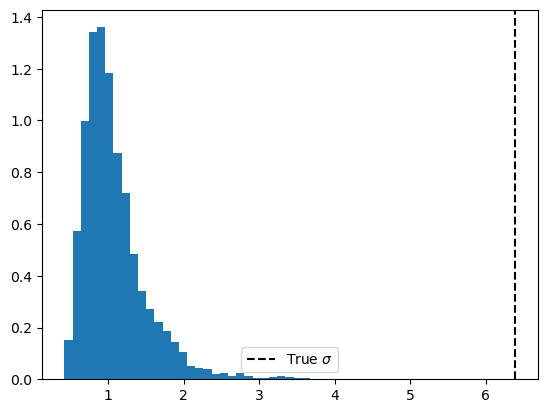

In [19]:
# Let's draw a histogram of the samples and mark the true value of $\sigma$ as a vertical line:
plt.hist(sigma_samples, bins=30, density=True)
plt.axvline(x=sigma, color='k', linestyle='--', label='True $\sigma$')
plt.legend()
plt.show()

tensor([0.0257, 0.3037, 0.3616, 0.4281], grad_fn=<SoftplusBackward0>)
tensor(35.0275, grad_fn=<MseLossBackward0>)
